## Mortgage Loans: Linear Regression Example

In [207]:
! pip install seaborn

Looking in indexes: https://artifact.intuit.com/artifactory/api/pypi/pypi-intuit/simple
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


In [208]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [209]:
df = pd.read_csv('../data/ames_housing.csv')
df.shape

(1460, 81)

In [210]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

## Exploratory data analysis

In [211]:
# target
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [212]:
# remove extreme outliers
print(df.shape[0])
cutpoint = df['SalePrice'].mean()+3* df['SalePrice'].std()
print(cutpoint)
df=df[df['SalePrice']<=cutpoint].copy()
print(df.shape[0])

1460
419248.70453907084
1438


In [213]:
# recoding neighborhood
print(df['Neighborhood'].value_counts().head())
df['Location']='Other'
df.loc[df['Neighborhood']=='NAmes', 'Location']='NAmes'
df.loc[df['Neighborhood']=='CollgCr', 'Location']='CollgCr'
df.loc[df['Neighborhood']=='OldTown', 'Location']='OldTown'
df.loc[df['Neighborhood']=='Somerst', 'Location']='Somerst'
df['Location'].value_counts()

NAmes      225
CollgCr    149
OldTown    112
Edwards    100
Somerst     85
Name: Neighborhood, dtype: int64


Other      867
NAmes      225
CollgCr    149
OldTown    112
Somerst     85
Name: Location, dtype: int64

In [214]:
# make neighborhood binary for simplicity
df['LargeNeighborhood']=np.where(df['Location']=='Other', 0,1)

In [215]:
# recoding building type
print(df['BldgType'].value_counts())
df['SingleFam']=np.where(df['BldgType']=='1Fam',1,0)
print(df['SingleFam'].value_counts())

1Fam      1198
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
1    1198
0     240
Name: SingleFam, dtype: int64


In [216]:
# one hot vect the building types
df = pd.get_dummies(df, columns = ['BldgType'])
df.drop(['SingleFam'], axis=1)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Location,LargeNeighborhood,SingleFam,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,CollgCr,1,1,1,0,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Other,0,1,1,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,CollgCr,1,1,1,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Other,0,1,1,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Other,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,Other,0,1,1,0,0,0,0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,Other,0,1,1,0,0,0,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0

In [217]:
# recoding total square feet
df['TotalSF'] = df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']
df['TotalSF'].describe()

count     1438.000000
mean      2532.068150
std        769.994523
min        334.000000
25%       2004.250000
50%       2460.000000
75%       2982.500000
max      11752.000000
Name: TotalSF, dtype: float64

In [218]:
# bedrooms
df['BedroomAbvGr'].describe()

count    1438.000000
mean        2.863004
std         0.811372
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

In [219]:
# recoding bathrooms
df['Bathrooms']=df['FullBath']+df['HalfBath']
df['Bathrooms'].describe()

count    1438.000000
mean        1.929068
std         0.781112
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Bathrooms, dtype: float64

In [220]:
# year
df['YearBuilt'].describe()

count    1438.000000
mean     1970.844924
std        30.093041
min      1872.000000
25%      1953.250000
50%      1972.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [221]:
# confirm no missing data
df[['SalePrice','YearBuilt','Bathrooms','BedroomAbvGr','TotalSF','BldgType_1Fam', 'BldgType_2fmCon','BldgType_Duplex','BldgType_Twnhs','BldgType_TwnhsE','LargeNeighborhood']].isnull().sum()

SalePrice            0
YearBuilt            0
Bathrooms            0
BedroomAbvGr         0
TotalSF              0
BldgType_1Fam        0
BldgType_2fmCon      0
BldgType_Duplex      0
BldgType_Twnhs       0
BldgType_TwnhsE      0
LargeNeighborhood    0
dtype: int64

In [222]:
# confirm all numerical
df[['SalePrice','YearBuilt','Bathrooms','BedroomAbvGr','TotalSF','BldgType_1Fam', 'BldgType_2fmCon','BldgType_Duplex','BldgType_Twnhs','BldgType_TwnhsE','LargeNeighborhood']].dtypes

SalePrice            int64
YearBuilt            int64
Bathrooms            int64
BedroomAbvGr         int64
TotalSF              int64
BldgType_1Fam        uint8
BldgType_2fmCon      uint8
BldgType_Duplex      uint8
BldgType_Twnhs       uint8
BldgType_TwnhsE      uint8
LargeNeighborhood    int64
dtype: object

In [195]:
df = df[['SalePrice','YearBuilt','Bathrooms','BedroomAbvGr','TotalSF','BldgType_1Fam', 'BldgType_2fmCon','BldgType_Duplex','BldgType_Twnhs','BldgType_TwnhsE','LargeNeighborhood']]
df

,SalePrice,YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LargeNeighborhood
0,208500,2003,3,3,2566,1,0,0,0,0,1
1,181500,1976,2,3,2524,1,0,0,0,0,0
2,223500,2001,3,3,2706,1,0,0,0,0,1
3,140000,1915,1,3,2473,1,0,0,0,0,0
4,250000,2000,3,4,3343,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1999,3,3,2600,1,0,0,0,0,0
1456,210000,1978,2,3,3615,1,0,0,0,0,0
1457,266500,1941,2,4,3492,1,0,0,0,0,0
1458,142125,1950,1,2,2156,1,0,0,0,0,1


In [196]:
# add feature scaling
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

columns = ['YearBuilt','Bathrooms','BedroomAbvGr','TotalSF','BldgType_1Fam', 'BldgType_2fmCon','BldgType_Duplex','BldgType_Twnhs','BldgType_TwnhsE','LargeNeighborhood']

part = df[columns]
scaled_results = std_scaler.fit_transform(part)
scaled = pd.DataFrame(scaled_results, columns=columns)
scaled

,YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LargeNeighborhood
0,1.068894,1.371512,0.168903,0.044083,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,1.232229
1,0.171364,0.090840,0.168903,-0.010482,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,-0.811537
2,1.002410,1.371512,0.168903,0.225966,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,1.232229
3,-1.856388,-1.189831,0.168903,-0.076739,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,-0.811537
4,0.969168,1.371512,1.401813,1.053532,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,-0.811537
...,...,...,...,...,...,...,...,...,...,...
1433,0.935926,1.371512,0.168903,0.088255,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,-0.811537
1434,0.237848,0.090840,0.168903,1.406904,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,-0.811537
1435,-0.992100,0.090840,1.401813,1.247107,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,-0.811537
1436,-0.692924,-1.189831,-1.064006,-0.488574,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,1.232229


In [202]:
#df = pd.concat([df['SalePrice'], scaled], axis=1)
df['SalePrice']
scaled
together = pd.concat([scaled, df['SalePrice']], axis=1)
together = together[together['YearBuilt'].notnull()]
together

,YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LargeNeighborhood,SalePrice
0,1.068894,1.371512,0.168903,0.044083,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,1.232229,208500.0
1,0.171364,0.090840,0.168903,-0.010482,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,-0.811537,181500.0
2,1.002410,1.371512,0.168903,0.225966,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,1.232229,223500.0
3,-1.856388,-1.189831,0.168903,-0.076739,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,-0.811537,140000.0
4,0.969168,1.371512,1.401813,1.053532,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,-0.811537,250000.0
...,...,...,...,...,...,...,...,...,...,...,...
1433,0.935926,1.371512,0.168903,0.088255,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,-0.811537,186500.0
1434,0.237848,0.090840,0.168903,1.406904,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,-0.811537,160000.0
1435,-0.992100,0.090840,1.401813,1.247107,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,-0.811537,174000.0
1436,-0.692924,-1.189831,-1.064006,-0.488574,0.447587,-0.148434,-0.193696,-0.175569,-0.293433,1.232229,120500.0


In [203]:
df = together

## Model Building

In [223]:
# declare features and target
features = ['YearBuilt','Bathrooms','BedroomAbvGr','TotalSF','BldgType_1Fam', 'BldgType_2fmCon','BldgType_Duplex','BldgType_Twnhs','BldgType_TwnhsE','LargeNeighborhood']
y = df['SalePrice']
X = df[features]
print(y.shape, X.shape)

(1438,) (1438, 10)


In [224]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

In [225]:
# Fit the model to the training dataset
mymodel = LinearRegression()
mymodel.fit(X_train, y_train)

LinearRegression()

In [35]:
# coefficients and intercept
mymodel.intercept_
mymodel.coef_

array([ 3.14836783e-01,  1.51958477e-01, -8.26387864e-02,  5.57468851e-01,
        4.20132176e+12,  1.63636360e+12,  2.10346457e+12,  1.91899236e+12,
        3.04402582e+12, -4.87894410e-02])

In [226]:
# what is the equation for this model?
cols=list(X.columns)
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
equation = f'y = {round(mymodel.intercept_,4)} + {round(xcoefs[0][0],4)}*{xcoefs[0][1]} + {round(xcoefs[1][0],4)}*{xcoefs[1][1]} + {round(xcoefs[2][0],4)}*{xcoefs[2][1]} + {round(xcoefs[3][0],4)}*{xcoefs[3][1]}+ {round(xcoefs[4][0],4)}*{xcoefs[4][1]}+ {round(xcoefs[5][0],4)}*{xcoefs[5][1]} + {round(xcoefs[6][0],4)}*{xcoefs[6][1]}+ {round(xcoefs[7][0],4)}*{xcoefs[7][1]}+ {round(xcoefs[8][0],4)}*{xcoefs[8][1]}+ {round(xcoefs[9][0],4)}*{xcoefs[9][1]}'
print("Regression Equation: ", equation)  

Regression Equation:  y = -1363279.4591 + 707.4591*YearBuilt + 13203.447*Bathrooms + -6819.7709*BedroomAbvGr + 48.7927*TotalSF+ 21090.2909*BldgType_1Fam+ 9218.5198*BldgType_2fmCon + -16106.8108*BldgType_Duplex+ -19060.3471*BldgType_Twnhs+ 4858.3473*BldgType_TwnhsE+ -6796.3548*LargeNeighborhood


In [227]:
# Predict the y-values on the testing dataset & examine the first few
y_preds = [int(x) for x in mymodel.predict(X_test)]
print(list(y_test[:5]))
print(y_preds[:5])

[132000, 160000, 149700, 82000, 233170]
[97780, 121282, 139882, 72672, 231616]


## Model Evaluation

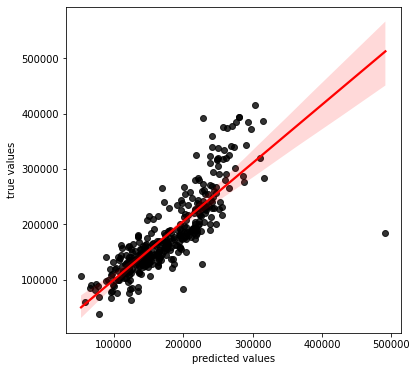

In [228]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_preds, 
                 y = y_test, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [229]:
# R-2 (coefficient of determination)
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.68

In [230]:
# root mean sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

39789.94867293051

In [231]:
# is that more or less than if we just used the average as our model?
avg_val = y_train.mean()
comparison = np.full((len(y_test), ), avg_val)
baseline=sqrt(metrics.mean_squared_error(y_test, comparison))
print(round(baseline,2))
print(round(rmse,2))
print('improvement:',round(rmse-baseline,2))

71241.69
39789.95
improvement: -31451.74


## Make new predictions

In [232]:
# remember the linear regression equation?
print(equation)

y = -1363279.4591 + 707.4591*YearBuilt + 13203.447*Bathrooms + -6819.7709*BedroomAbvGr + 48.7927*TotalSF+ 21090.2909*BldgType_1Fam+ 9218.5198*BldgType_2fmCon + -16106.8108*BldgType_Duplex+ -19060.3471*BldgType_Twnhs+ 4858.3473*BldgType_TwnhsE+ -6796.3548*LargeNeighborhood


In [233]:
# make some fake data
fake1= [[2010, 2, 3, 2000, 1,0]] # modest SF home
fake2= [[2015, 3, 5, 4000, 1,1]] # large SF home in big neighborhood
fake3= [[1980, 1, 2, 1000, 0,0]] # small home, not SF, outside big neighborhood

In [192]:
# make predictions just using our equation:
for data in [fake1, fake2, fake3]:
    YearBuilt=data[0][0]
    Bathrooms=data[0][1]
    BedroomAbvGr=data[0][2]
    TotalSF=data[0][3]
    SingleFam=data[0][4]
    LargeNeighborhood=data[0][5]
    y = -1360501.3809 + 704.4287*YearBuilt + 12738.4775*Bathrooms + -7783.1712*BedroomAbvGr + 49.824*TotalSF+ 25282.091*SingleFam+ -6637.2636*LargeNeighborhood 
    print('$',int(y))

$ 182457
$ 276162
$ 81263


In [155]:
# pickle your model
import pickle
filename = open('ames_housing_lr_model.pkl', 'wb')
pickle.dump(mymodel, filename)
filename.close()

In [157]:
## read in our pickle file
filename = open('ames_housing_lr_model.pkl', 'rb')
unpickled_model = pickle.load(filename)
filename.close()

In [165]:
# make predictions
for data in [fake1, fake2, fake3]:
    print('$',int(unpickled_model.predict(data)))

$ 182457
$ 276162
$ 81263


## Turn that into a function

In [288]:
def ames_lr_function(YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood):
    checksum=0
    for var in [YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood]:
        if isinstance(var,int)==False:
            checksum+=1
    if (YearBuilt<1900)|(YearBuilt>2020):
        checksum+=1
    if (Bathrooms<1) | (Bathrooms>5):
        checksum+=1
    if (BedroomAbvGr<1) | (BedroomAbvGr>5):
        checksum+=1
    if (TotalSF<100)|(TotalSF>5000):
        checksum+=1
    if (SingleFam!=0) & (SingleFam!=1):
        checksum+=1
    if (LargeNeighborhood!=0) & (LargeNeighborhood!=1):
        checksum+=1
    if checksum>0:
        return "Please provide adequate inputs"
    else:
        y = [-1360501.3809 + 704.4287*YearBuilt + 12738.4775*Bathrooms + -7783.1712*BedroomAbvGr + 49.824*TotalSF+ 25282.091*SingleFam+ -6637.2636*LargeNeighborhood]
#         y = unpickled_model.predict([[YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood]])
        formatted_y = "${:,.2f}".format(y[0])
        return formatted_y 

In [289]:
# test the function
YearBuilt=2015
Bathrooms=3
BedroomAbvGr=3
TotalSF=2000
SingleFam=0
LargeNeighborhood=1
ames_lr_function(YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood)

'$166,799.10'